# Data Analysis

## Introduction

#### The purpose of our analysis is to identify if there was any relationship between either crime vs. unemployment or crime vs. median income at the state-level in the United States between 1995 and 2016. Note that we choose this time frame because this was the data range available from the sources for reliable data and we determined that an approximately 20-year period We began by obtainings 3 state-level datasets needed for this analysis:
    - Crime Rate data (FBI - Crime Data Explorer site)
    - Unemployment Rate data (Bureau of Labor Statistics site)
    - Median Household Income data (Census.gov site)
  
#### Once these datasets were obtained, we wanted to visualize the data over time for these 3 variables to determine if there were any identifiable trends in the data. After creating the necessary data frames for each data set, we determined that the most appropriate visualizations were the following (for all 3 variables):
    - Cloropleth Maps
    - Heat Maps
    - Line Graphs

#### After the visualizations were complete (below), we wanted to identify if there was any correlation between the 3 time series variables. Based on the data available, we we determined that Granger Causality was the best statistical method to determine if there was any correaltion between 2 sets of time series data. Refer below for our conclusions on identifying any relationship between crime vs. unemployment and crime vs. median income. 

## Choropleth Maps

In [141]:
# Import dependencies
#import config 
import pandas as pd
import plotly
import plotly.plotly as py
import os

# Create initial data frames
crime_df = pd.read_csv(os.path.join('formatted','crimes.csv'))
median_income_df = pd.read_csv(os.path.join('formatted','median_income.csv'))
unemployment_df = pd.read_csv(os.path.join('formatted','unemployment.csv'))

In [142]:
# API creds
plotly.tools.set_credentials_file(username='alandavila', api_key=config.api_key)

NameError: name 'config' is not defined

In [143]:
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML

In [144]:
init_notebook_mode(connected=True)

In [145]:
years = ['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
         '2010', '2011', '2012', '2013', '2014', '2015', '2016']

scl = [[0.0, 'rgb(585,580,587)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(65,39,123)']]

### Crime Rate over Time

In [146]:
figure = {
    'data': [],
    'layout': {},
    'frames': []
}

In [147]:
figure['layout']['hovermode'] = 'closest'
figure['layout']['sliders'] = {
    'args': [
        'transition', {
            'duration': 400,
            'easing': 'cubic-in-out'
        }
    ],
    'initialValue': years[0],
    'plotlycommand': 'animate',
    'values': years,
    'visible': True
}
figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

figure['layout']['title'] = 'Crime rate per State'
figure['layout']['geo'] = dict(scope='usa',
                               projection=dict( type='albers usa' ),
                               showlakes = True,
                               lakecolor = 'rgb(255, 255, 255)')

In [148]:
data_dict = dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = crime_df['State'],
        z = crime_df[years[0]].astype(float),
        locationmode = 'USA-states',
        text = crime_df[years[0]],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Crime per 100k habitants")
        )
figure['data'].append(data_dict)

In [149]:
for year in years:
    frame = {'data': [], 'name': str(year)}
    
    data_dict = dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = crime_df['State'],
        z = crime_df[year].astype(float),
        locationmode = 'USA-states',
        text = crime_df[year],
        marker = dict(
            line = dict (
                color = 'rgb(275,275,275)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Crime per 100k habitants")
        )
    
    frame['data'].append(data_dict)
    figure['frames'].append(frame)
    slider_step = {'args': [
        [year],
        {'frame': {'duration': 300, 'redraw': True},
         'mode': 'immediate',
       'transition': {'duration': 300}}
     ],
     'label': year,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

    
figure['layout']['sliders'] = [sliders_dict]

In [150]:
iplot(figure)

### Unemployment over Time

In [151]:
#reset figure's layout, data and frames
figure = {
    'data': [],
    'layout': {},
    'frames': []
}

#Define layout
figure['layout']['hovermode'] = 'closest'
figure['layout']['sliders'] = {
    'args': [
        'transition', {
            'duration': 400,
            'easing': 'cubic-in-out'
        }
    ],
    'initialValue': years[0],
    'plotlycommand': 'animate',
    'values': years,
    'visible': True
}
figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

figure['layout']['title'] = 'Unemployment Percent'
figure['layout']['geo'] = dict(scope='usa',
                               projection=dict( type='albers usa' ),
                               showlakes = True,
                               lakecolor = 'rgb(255, 255, 255)')
#Define Data
data_dict = dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = unemployment_df['State'],
        z = unemployment_df[years[0]].astype(float),
        locationmode = 'USA-states',
        text = unemployment_df[years[0]],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Unemployment Percent")
        )
figure['data'].append(data_dict)

#Define Frames
for year in years:
    frame = {'data': [], 'name': str(year)}
    
    data_dict = dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = unemployment_df['State'],
        z = unemployment_df[year].astype(float),
        locationmode = 'USA-states',
        text = unemployment_df[year],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = 'Unemployment %')
        )
    
    frame['data'].append(data_dict)
    figure['frames'].append(frame)
    slider_step = {'args': [
        [year],
        {'frame': {'duration': 300, 'redraw': True},
         'mode': 'immediate',
       'transition': {'duration': 300}}
     ],
     'label': year,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

#add sliders for layout
figure['layout']['sliders'] = [sliders_dict]
    
#Plot
iplot(figure)

### Income

In [152]:
#reset figure's layout, data and frames
figure = {
    'data': [],
    'layout': {},
    'frames': []
}

#Define layout
figure['layout']['hovermode'] = 'closest'
figure['layout']['sliders'] = {
    'args': [
        'transition', {
            'duration': 400,
            'easing': 'cubic-in-out'
        }
    ],
    'initialValue': years[0],
    'plotlycommand': 'animate',
    'values': years,
    'visible': True
}
figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

figure['layout']['title'] = 'Median Income (USD)'
figure['layout']['geo'] = dict(scope='usa',
                               projection=dict( type='albers usa' ),
                               showlakes = True,
                               lakecolor = 'rgb(255, 255, 255)')
#Define Data
data_dict = dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = median_income_df['State'],
        z = median_income_df[years[0]].astype(float),
        locationmode = 'USA-states',
        text = median_income_df[years[0]],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Median Income")
        )
figure['data'].append(data_dict)

#Define Frames
for year in years:
    frame = {'data': [], 'name': str(year)}
    
    data_dict = dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = median_income_df['State'],
        z = median_income_df[year].astype(float),
        locationmode = 'USA-states',
        text = median_income_df[year],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = 'Median Income (USD)')
        )
    
    frame['data'].append(data_dict)
    figure['frames'].append(frame)
    slider_step = {'args': [
        [year],
        {'frame': {'duration': 300, 'redraw': True},
         'mode': 'immediate',
       'transition': {'duration': 300}}
     ],
     'label': year,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

#add sliders for layout
figure['layout']['sliders'] = [sliders_dict]
    
#Plot
iplot(figure)

## Heat Maps

In [153]:
# Import Dependencies
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

### Crime Rate

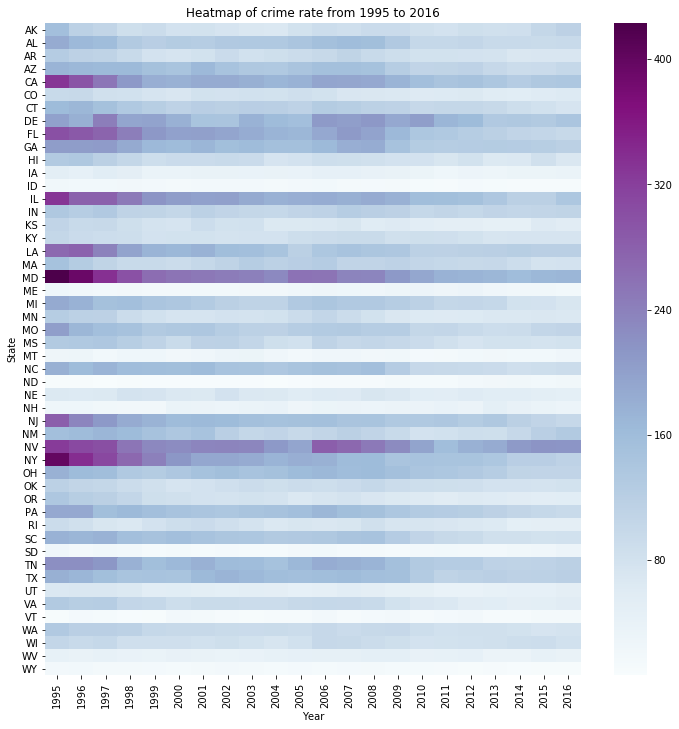

In [154]:
# Create raw df
crimes_raw = pd.read_csv("formatted/crimes.csv")

# Format df for states
new_crimes_df = crimes_raw[crimes_raw.State != 'DC']

tidy_crimes = pd.melt(new_crimes_df, id_vars = ['State'], var_name='Year', value_name='crime_rate')
tidy_crimes.sort_values(by=['State','Year'], inplace=True)

crime_matrix = tidy_crimes.pivot("State", "Year", "crime_rate")

# Create heat map
fig = plt.figure(figsize=(12,12))
r = sns.heatmap(crime_matrix, cmap='BuPu')
r.set_title("Heatmap of crime rate from 1995 to 2016")
fig.savefig("Images/heatmap_crime.png")

### Unemployment 

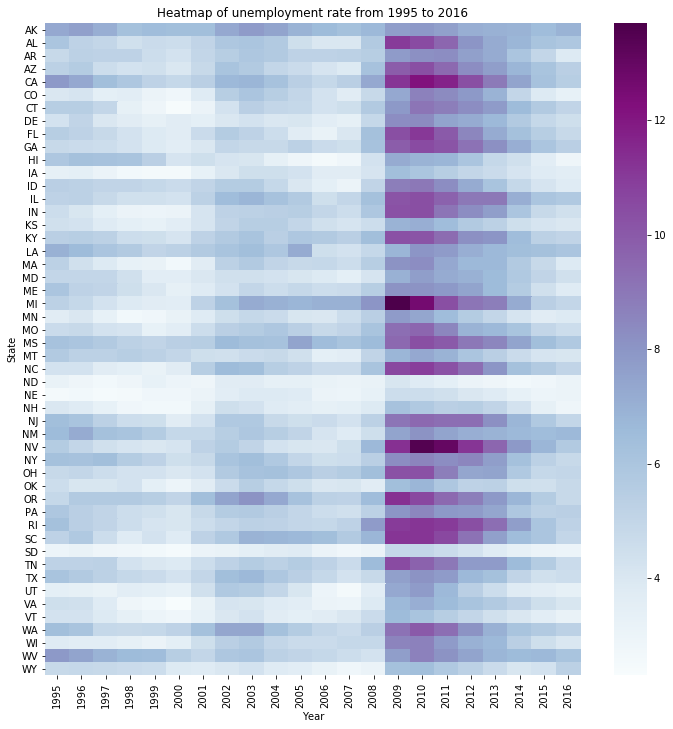

In [155]:
# Create raw df
unemployment_raw = pd.read_csv("formatted/unemployment.csv")

# Format df for states
new_unemployment_df = unemployment_raw.drop(unemployment_raw.index[8])

tidy_unemployment = pd.melt(new_unemployment_df, id_vars = ['State'], var_name='Year', value_name='unemployment_rate')
tidy_unemployment.sort_values(by=['State','Year'], inplace=True)

unemployment_matrix = tidy_unemployment.pivot("State", "Year", "unemployment_rate")

# Create heat map
fig = plt.figure(figsize=(12,12))
r = sns.heatmap(unemployment_matrix, cmap='BuPu')
r.set_title("Heatmap of unemployment rate from 1995 to 2016")
fig.savefig("Images/heatmap_unemployment.png")

### Income

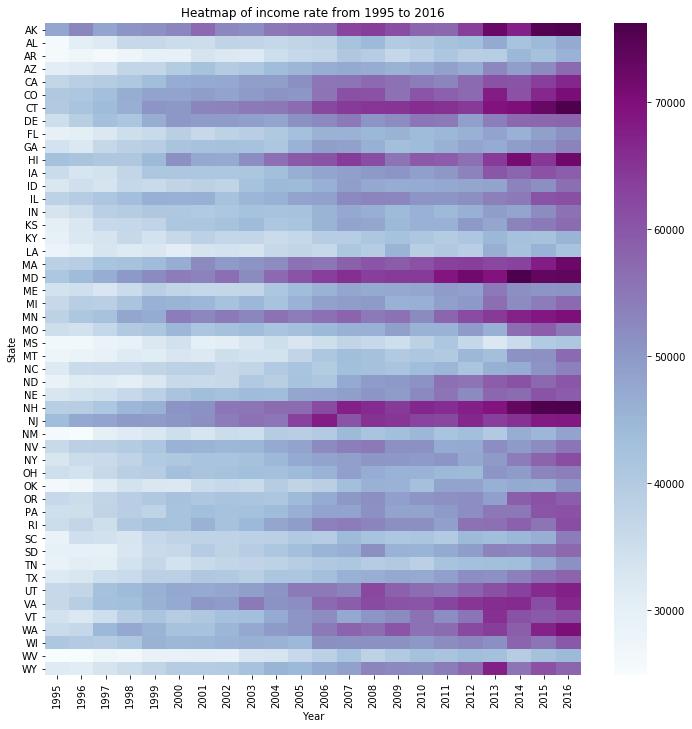

In [156]:
# Create raw df
income_raw = pd.read_csv("formatted/median_income.csv")

# Format df for states
new_income_df = income_raw.drop(income_raw.index[[0,9]])

tidy_income = pd.melt(new_income_df, id_vars = ['State'], var_name='Year', value_name='income_rate')
tidy_income.sort_values(by=['State','Year'], inplace=True)

income_matrix = tidy_income.pivot("State", "Year", "income_rate")
income_matrix = income_matrix.drop(['1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994'], axis=1)

# Create heat map
fig = plt.figure(figsize=(12,12))
r = sns.heatmap(income_matrix, cmap='BuPu')
r.set_title("Heatmap of income rate from 1995 to 2016")
fig.savefig("Images/heatmap_income.png")

## Line Trends


In [157]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import csv
import matplotlib.dates as mdates
import datetime as dt
import numpy as np

import os
import plotly
import plotly.plotly as py

### Crime Rate

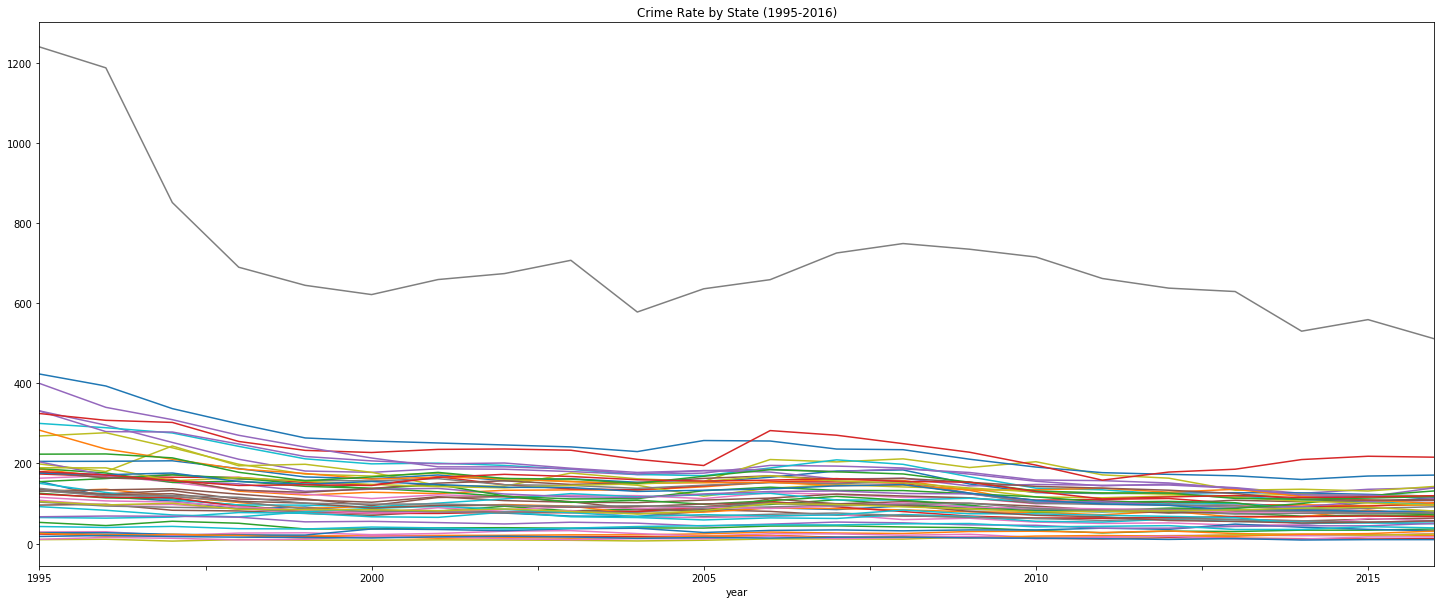

In [158]:
# Create data frame
crime_path = "formatted/crimes.csv"
crime = pd.read_csv(crime_path)
crime.set_index('State', inplace=True)
crime.dropna(how='all', inplace=True)
crime = crime.unstack().to_frame().reset_index().rename(columns={"level_0": "year", 0: "crime rate"})

# Plot line trends for crime
fig, ax = plt.subplots(1)
for index, group in crime.groupby("State"):
    group.plot("year", "crime rate", ax=ax, label = index, figsize = (25, 10), fontsize = "medium", title = "Crime Rate by State (1995-2016)")


ax.legend_.remove()
plt.savefig("Images/Crime_Over_Time.png")
plt.show()

###### *Note: In the graph above, Washington D.C. presents itself as a major outlier, as indicated by being significantly higher than the 50 states. As is it not a state, and it is primarily just the mtroplex of a single city, the crime rate in D.C. is more concentrated compared to other states. It is includes here to show how crime in D.C. compares against the other states.

### Unemployment Rrate

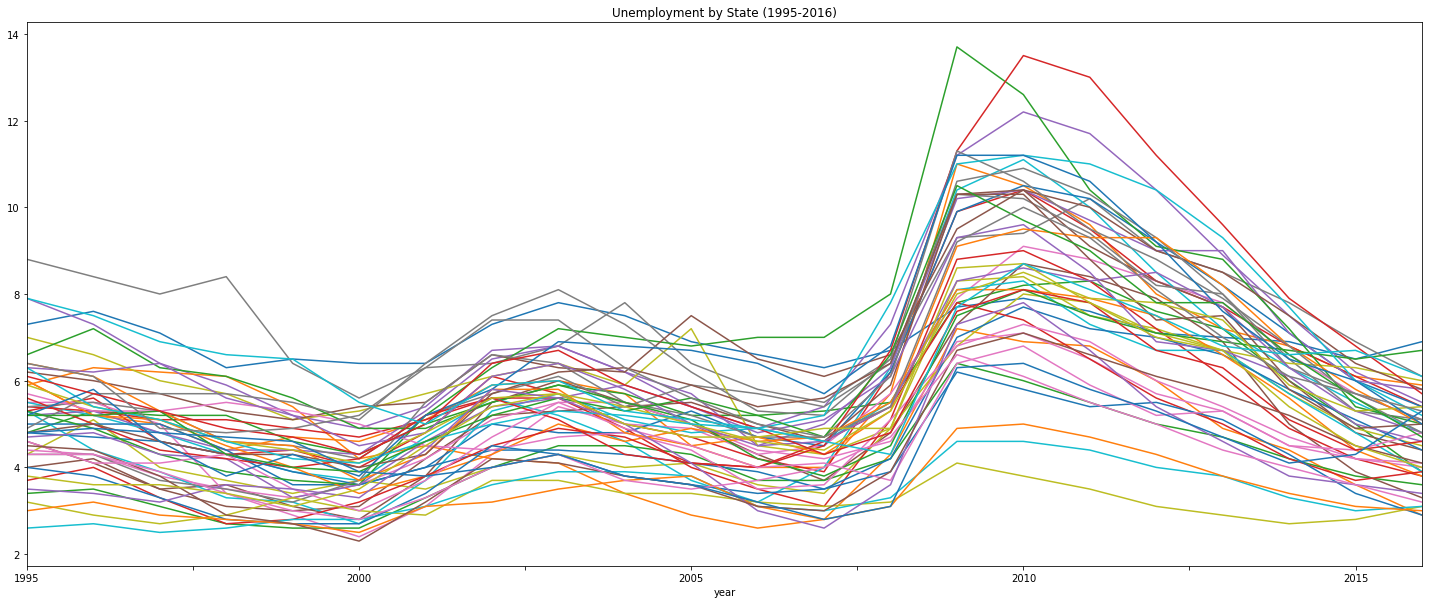

In [159]:
# Create df
csv_path = "formatted/unemployment.csv"
ue_df = pd.read_csv(csv_path)
ue_df.set_index('State', inplace=True)
ue_df.dropna(how='all', inplace=True)

ue_df = ue_df.unstack().to_frame().reset_index().rename(columns={"level_0": "year", 0: "rate"})
top_year = ue_df.groupby("year").rate.nlargest(5).to_frame()
top_year = top_year.reset_index(level=1)\
                            .merge(ue_df, how='left', left_on="level_1", right_index=True)\
                             .drop(["level_1", "rate_y"], axis=1)

# Plot line trends for all 50 states
fig, ax = plt.subplots(1)

for index, group in ue_df.groupby("State"):
    group.plot("year", "rate", ax=ax, label=index, figsize=(25, 10), fontsize ="medium", title = "Unemployment by State (1995-2016)" )


ax.legend_.remove()
plt.savefig("Images/Unemployment_Over_Time.png")
plt.show()

### Income Level

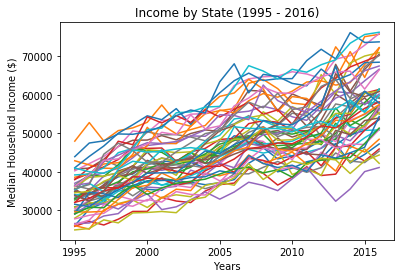

In [160]:
median_income_df = pd.read_csv(os.path.join('formatted','median_income.csv'))

# Drop the row with nation-level data 
median_income_df = median_income_df.drop(median_income_df.index[0])

 # Set state as index
income_df = median_income_df.set_index(["State"])

# reorganize df to match crime and unemployment data
income_df_formatted = income_df[income_df.columns[::-1]]
income_df_formatted = income_df_formatted.drop(['1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994'], axis=1)

# loop through all states
for index, row in income_df_formatted.iterrows():
    x = income_df_formatted.columns
    y= row.values
    plt.plot(x, y, label = index)

# Add Labels to plot
plt.xlabel("Years")
plt.ylabel("Median Household Income ($)")
plt.title("Income by State (1995 - 2016)")
plt.savefig("Images/Income_Over_Time.png")

plt.show()

## Statistical Analysis via Granger Causality

The purpose of the follwoing analysis is to determine if the median income or unemployment time series information can be used to predict future crime rates. We will use the [Granger Causality](http://www.scholarpedia.org/article/Granger_causality) test in order to determine the predictive power of those two variables. In the Granger Causality test two series are compared. 

* A value for series **X** at time *t* is modeled via linear regression using as parameters the values at t-1, t-2,.., t-j for a choser lag j. 
* The value for seres **X** at ttie *t* is modeled again but incliding parameters for the second series **Y** at t-,. t-2, .., t-j
* A statistical test is performed to determined whether adding the previous values of **Y** helped modeled the current value of **X** better.

We use the [statsmodel](https://www.statsmodels.org/stable/index.html) module's implementation of the Granger Causality test. This implementation starts from the null hypothesis that two time series do not **Granger Cause** the other and then p-values are calculates to confirm or reject the hypothesis

#### Let's pick Arkansa as an example

Crime rate and median income show some signs of non-stationarity. We need to transform our data to remove the stationarity in order to perform the Granger Causatily test. 

In [162]:
import config
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import plotly
import plotly.plotly as py
from statsmodels.tsa.stattools import grangercausalitytests

crime_df = pd.read_csv(os.path.join('formatted','crimes.csv'))
median_income_df = pd.read_csv(os.path.join('formatted','median_income.csv'))
unemployment_df = pd.read_csv(os.path.join('formatted','unemployment.csv'))

crime_df.set_index('State', inplace=True)
median_income_df.set_index('State', inplace=True)
unemployment_df.set_index('State', inplace=True)

unemployment_df.rename(index={'District of Columbia':'DC'}, inplace=True)
median_income_df.rename(index={'D.C.':'DC'}, inplace=True)
median_income_df = median_income_df.drop('United States')

unemployment_df.rename(index={'District of Columbia':'DC'}, inplace=True)
median_income_df.rename(index={'D.C.':'DC'}, inplace=True)
#median_income_df = median_income_df.drop('United States')
median_columns = list(median_income_df.columns)
median_columns.sort()
median_columns = median_columns[11:]
median_income_df = median_income_df[median_columns]
median_income_df.head();

#Helper function to remove stationarity of a time series via differentiation
def diff_data(data, lag=1):
    '''Input: data as pandas Series and lag
       Output: pandas series seiers[n] = series[n] - series[n-lag]'''
    if lag == 0:
        return pd.Series(data.iloc[:])
    up = data.iloc[lag:]  
    down = data.iloc[:-lag]
    up.values  - down.values
    return pd.Series(up.values - down.values, index=up.index)

def plot_state_lag(state='AK', lag = 1):
    fig, axes = plt.subplots(1,3,figsize=(15,10))
    labels = ['crime rate', 'unemployment', 'median income']
    data = [crime_df, unemployment_df, median_income_df]
    data = [diff_data(data.loc[state,:], lag) for data in data]
    for ax, label, data in zip(axes, labels, data):
        x_axis_labels = list (data.index.values)
        x_axis_values = list (range(len(x_axis_labels)))
        ax.plot(x_axis_values, data, label=label,marker='o')
        ax.set_xticks(x_axis_values)
        ax.set_xticklabels(x_axis_labels,rotation='45')
        ax.legend()
    plt.tight_layout()
    plt.show()

plot_state_lag('AK', lag=0)

SyntaxError: invalid syntax (config.py, line 733)

Stationarity of a time series can be removed by "differentiating" the time series

**Remove stationarity** by using a lag-1 difference

In [163]:
plot_state_lag('AK', 1)

NameError: name 'plot_state_lag' is not defined

Write a function that converts the data from 2 DataFrames into a single array that can be used in the *grangercausality* funtion.
Include a transformation with lag to remove sationarity of our time series

In [164]:
def make_array(dataframe1,dataframe2, state, lag=1):
    '''Input dataframe1, 2: dataframes that will ge transformed
             state: state to transform
       Output: array (observariont, 2) of the transformed data for both dataframes'''
    return np.stack([diff_data(dataframe1.loc[state,:],lag), diff_data(dataframe2.loc[state,:],lag)], axis=1)



The statsmodels module uses four different tests to confirm/reject Granger Causality via p values. We will plot all four p values in our analysis

In [165]:
tests = ['lrtest', 'params_ftest','ssr_chi2test', 'ssr_ftest']
states = crime_df.index
granger_crime_unemp_df = pd.DataFrame()
granger_crime_income_df = pd.DataFrame()

for state in states:
    stationary = make_array(crime_df, unemployment_df, state,1)
    results = grangercausalitytests(stationary, maxlag=1, verbose=False)
    get_p_val = []
    for test in tests:
        get_p_val.append(results[1][0][test][1])
    granger_crime_unemp_df[state] = get_p_val
    
    
for state in states:
    stationary = make_array(crime_df, median_income_df, state,1)
    results = grangercausalitytests(stationary, maxlag=1, verbose=False)
    get_p_val = []
    for test in tests:
        get_p_val.append(results[1][0][test][1])
    granger_crime_income_df[state] = get_p_val
    
fig, ax = plt.subplots(figsize=(20,5))
markers = ['o', '+', 's', '^']
for i,marker in enumerate(markers):
    ax.plot(granger_crime_income_df.iloc[i], marker=marker,linestyle='None', label=tests[i])
    ax.set_ylabel('P-Values')
plt.axhline(y=0.05, xmin=0, xmax=20, color='r')
plt.title('P-values per state testing the null Granger Causality Hypothesis\nCrime vs Income')
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'diff_data' is not defined

IndexError: single positional indexer is out-of-bounds

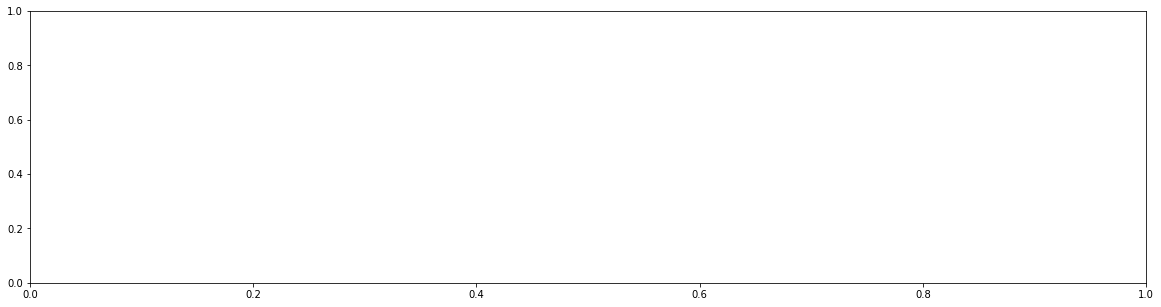

In [166]:
fig, ax = plt.subplots(figsize=(20,5))
markers = ['o', '+', 's', '^']
for i,marker in enumerate(markers):
    ax.plot(granger_crime_unemp_df.iloc[i], marker=marker,linestyle='None', label=tests[i])
    ax.set_ylabel('P-Values')
plt.axhline(y=0.05, xmin=0, xmax=20, color='r')
plt.title('P-values per state testing the null Granger Causality Hypothesis\nCrime vs Unemployment')
plt.legend()
plt.tight_layout()
plt.show()

### Conclusion:

* None of the states shows Granger Causality when comparing crime vs median income.
* A handfull of states showed Granger Causality when comparing crime vs unemployment. The majority did not

We can conclude that unemployment and median income are not good predictors of crime rate in most states of the United States when analyzing data form 1995 to 2016.